# Declaration of Originality

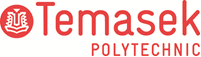

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Hugo Yee (2401496A)
* Tutorial Group                : PC06
* Tutor						    : Mr Emile
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [10]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Project Goal

The main goal of this dataset is to build a model that predicts whether a bank client will subscribe to a term deposit (yes/no) after being contacted during a direct marketing phone campaign by a bank.

Business Problem:
Banks run telemarketing campaigns to try to convince existing or potential clients to purchase a term deposit product (a savings/investment product). Each phone call generates data about the client and campaign interaction. The company wants to identify which customers are more likely to subscribe to the product so that they can better allocate marketing resources and improve campaign effectiveness.


# 2. Data Understanding

## 2.1 Load dataset

In [11]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "bank-full.csv"
df = pd.read_csv(FILE_PATH, sep=";")


This code reads the `bank-full.csv `file into a pandas DataFrame so the data can be worked with in Python. The file path is stored in FILE_PATH to keep the code clear and easy to update, and `pd.read_csv()` is used with `sep=";"` because the dataset uses semicolons as delimiters, ensuring the columns are parsed correctly.

### 2.1.1 Sanity check

In [12]:
df.shape  # Sanity check: shows (rows, columns) to confirm the dataset loaded correctly and meets the >1000 rows requirement.


(45211, 17)

`df.shape` is used as a fast sanity check after loading the dataset. It returns the number of rows and columns, which helps confirm the file was parsed correctly and that the dataset meets the requirement of having more than 1,000 rows

### 2.1.2 Initial Data Preview

In [13]:
df.head()  # Quick preview: displays the first 5 rows to verify columns/values look correct


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


`df.head()` previews the first few rows to verify that the columns look correct (categorical fields like job, marital, month, and numeric fields like age, balance). This help me to confirm the target column, which in this dataset is y with a yes/no outcome for classification.

## 2.2 Summary Statistics

### 2.2.1 Type of Variable for Each Column

In [14]:
## Understand the type of variable for each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Explanation and rationale**:
This step is used to understand the structure of the dataset by showing each column’s data type and the number of non-null values. It helps identify which variables are numeric and which are categorical, which is important for deciding how the data should be prepared for analysis and modeling.

**Insights**:
The dataset contains 45,211 rows and 17 columns. There are `7 numeric variables` (such as age, balance, and duration) and `10 categorical variables` (such as job, education, and month). All columns have complete data with no missing values, so no immediate data cleaning is required.

### 2.2.2 Number of Unique Values per Column

In [28]:
df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Explanation and rationale**:
This step shows how many distinct values appear in each column. It helps differentiate between categorical variables with a small set of possible values and numeric variables that span a wide range, which is useful when choosing encoding and preprocessing methods.

**Insights**:
Categorical columns such as job (12 values), marital (3 values), and education (4 values) have a limited number of categories. Numeric columns like balance and duration have many unique values, indicating continuous variables that may require scaling or outlier handling later.

### 2.2.3 Check for Missing Data

In [30]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Explanation and rationale**:
This step checks whether any values are missing in each column. Missing data can cause errors in analysis or bias results if not handled properly, so it is important to detect it early.

**Insights**:
All columns show zero missing values, meaning the dataset is complete and does not require row removal or value imputation.

### 2.2.4 Describe Data Distribution

In [31]:
df.describe(include="all")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Explanation and rationale**:
This step provides summary statistics for both numeric and categorical variables. For numeric data, it includes measures such as mean, standard deviation, and quartiles. For categorical data, it shows the most frequent values and their counts.

**Insights**:
The average customer age is approximately 41 years, with ages ranging from 18 to 95. The balance variable shows a wide spread, including negative values and very large positive values, suggesting potential outliers. Categorical summaries show that blue-collar is the most common job, married is the most common marital status, and most clients did not subscribe to the product (y = no).

### 2.2.5 Statistical Summary (Mean, Minimum, Maximum)

In [32]:
df.select_dtypes(include='number').agg(['mean', 'min', 'max'])


,age,balance,day,duration,campaign,pdays,previous
mean,40.93621,1362.272058,15.806419,258.16308,2.763841,40.197828,0.580323
min,18.00000,-8019.000000,1.000000,0.00000,1.000000,-1.000000,0.000000
max,95.00000,102127.000000,31.000000,4918.00000,63.000000,871.000000,275.000000


**Explanation and rationale**:
This step focuses on key summary statistics for numeric variables only. It provides a concise view of central tendency and range, which is useful for quickly identifying unusual values or extreme ranges.

**Insights**:
The mean age is around 41, while balances range from -8,019 to 102,127, indicating strong variability. The duration variable ranges from 0 to 4,918 seconds, suggesting a highly skewed distribution that may need special consideration during modeling.

### 2.2.6 Correlation Analysis

In [33]:
df.corr(numeric_only=True)


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


**Explanation and rationale**:
This step calculates correlations between numeric variables to identify linear relationships. Correlation analysis helps detect redundant features and understand how variables relate to one another.

**Insights**:
Most numeric variables show weak correlations with each other. The strongest relationship is between pdays and previous (moderate positive correlation), which makes sense since both relate to previous contact history. No strong multicollinearity is observed among the remaining numeric features

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

####  2.3.1.1.1 Target class balance (y)

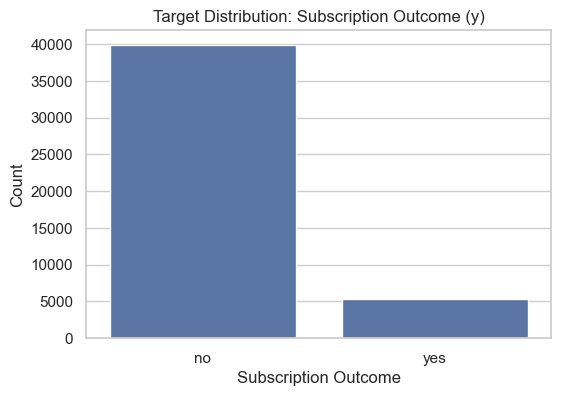

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df)
plt.title("Target Distribution: Subscription Outcome (y)")
plt.xlabel("Subscription Outcome")
plt.ylabel("Count")
plt.show()

**Explanation and rationale**:
This plot visualises the frequency of each class in the target variable `y`, which represents whether a customer subscribed to the product. Examining the target distribution is a critical step in classification problems, as a strong imbalance can bias model training and lead to misleading performance metrics.

**Insights**:
The plot shows that the `no` class heavily dominates the dataset, while the `yes` class represents a much smaller proportion of observations. This confirms a clear class imbalance, indicating that most customers did not subscribe. For modeling, this suggests that accuracy alone would not be sufficient to evaluate performance, and metrics that account for minority class prediction should be prioritised.

### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection